# Simple MCMC Example

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Simple function to calculate chisq
def get_chisq(data,model,sigma):
    chisq = np.sum((data-model)**2/sigma**2)
    return chisq

In [3]:
# A function to get the random steps for our parameters: step size will
# be an array of values having the same length as our number of parameters,
# and the value for each index corresponds to the std in the gaussian we pull from
# when taking the step
def get_step(step_size):
    step = np.random.randn(len(step_size))*step_size
    return step

In [4]:
# We'll make things as simple as possible and use a 
# a linear fit for this example
def line(x,pars):
    return  x*pars[0] + pars[1]

In [5]:
x = np.linspace(-1,1,100)
# Choose arbitrary true values for linear fit
pars_true = [3,0.5]
y_true = line(x,pars_true)
# Generate noisy data by modifying with gaussian noise having σ = 0.3
noise = np.ones(len(x))*0.3
y = y_true + np.random.randn(len(x))*noise

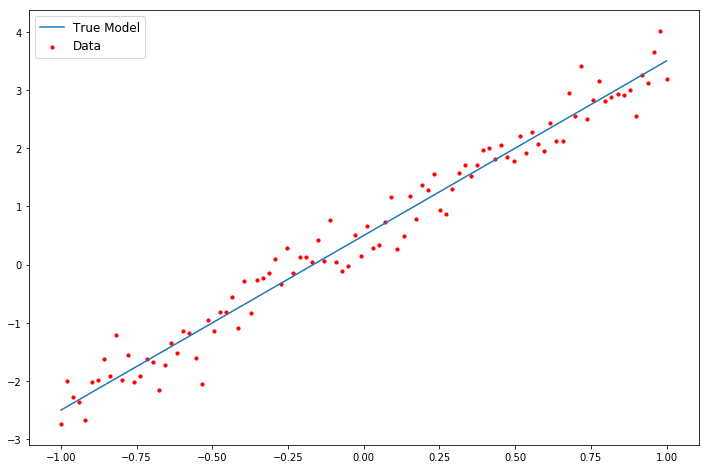

In [6]:
# Take a look at the real data vs. the noisy data
plt.figure(figsize=(12,8))
plt.plot(x,y_true, label="True Model")
plt.scatter(x,y,c='r',s=10, label="Data")
plt.legend(fontsize="large")
plt.show()

In [7]:
# Take a "first step" to get a guess for our parameters
# (in reality, you don't know the true value ahead of time,
# and just pick the first pars values intuitively)
step_size = np.array([0.1,0.1])
pars = []
pars.append(np.array([4, 0.1]))
# Setup an array of chisq to keep track of its history as we
# walk around in parameter space
chisq = []
chisq.append(get_chisq(y,line(x,pars[0]),noise))

In [8]:
# Now let's step about a large number of times and see what happens!
# Recall that for MCMC, we want to reject/accept the step with probability
# equal to e^(-0.5*ΔΧ^2). This way, we're more likely to wander into areas
# of parameter space that improve our chisq (-> better fit!)
nstep = 5000
steps_taken = 0
while steps_taken < nstep:
    # Update our parameters
    new_pars = pars[-1] + get_step(step_size)
    new_y = line(x, new_pars)
    new_chisq = get_chisq(y, line(x,new_pars), noise)
    
    # Calculate ΔΧ^2
    Δ_chisq = new_chisq - chisq[-1]
    prob_step = np.exp(-0.5*Δ_chisq)
    
    # If ΔΧ^2 > 1, we definitely want to take the step, as Χ^2 improved!
    # However, even if Χ^2 got worse, we take the step with the calculated
    # probability. We can implement this by pulling from a flat distribution
    # from 0 to 1
    accept = np.random.rand(1) < prob_step
    
    if accept:
        pars.append(new_pars)
        chisq.append(new_chisq)
        steps_taken += 1

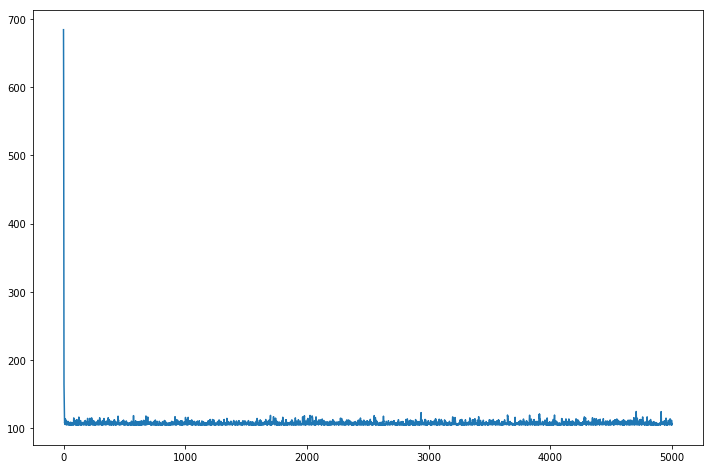

In [9]:
# Let's see how our chisq varied
plt.figure(figsize=(12,8))
plt.plot(chisq)
plt.show()

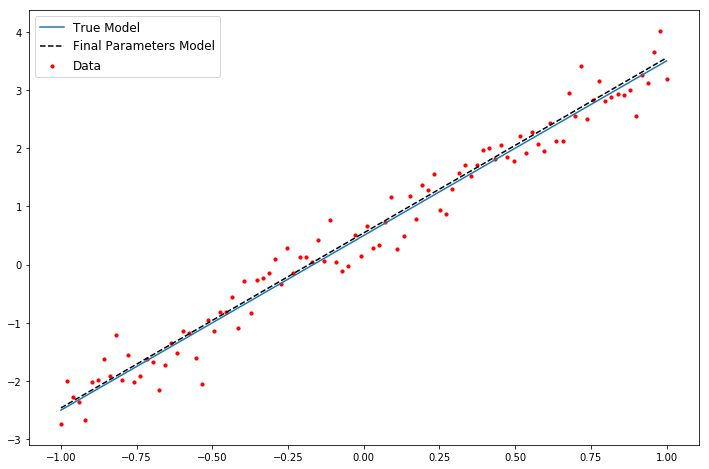

In [10]:
# OK, it quickly converged to something near what we want and then wobbled around the probable true values.
# Let's take a look at the final fit we get:
plt.figure(figsize=(12,8))
plt.plot(x,y_true, label="True Model")
plt.scatter(x,y,c='r',s=10, label="Data")
plt.plot(x, line(x,pars[-1]), c='k', ls='--',label="Final Parameters Model")
plt.legend(fontsize="large")
plt.show()

In [11]:
# A really nice package to make what are called "corner plots", which are a way
# to visualize the distribution of your parameters in an MCMC chain. I recommend
# playing around with it if you MCMC in the upcoming assignment!
import corner

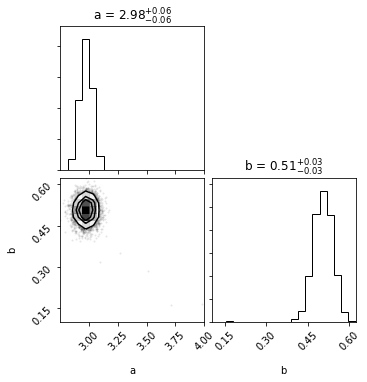

In [12]:
pars = np.array(pars)
corner.corner(pars,labels=["a","b"],show_titles=True,title_fmt='.2f')
plt.show()